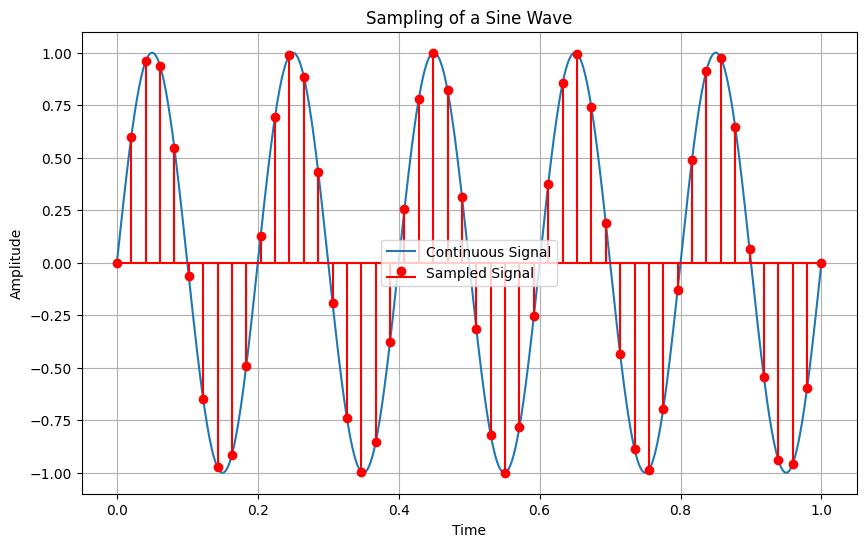

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a continuous signal (e.g., a sine wave)
frequency = 5  # Frequency of the signal
sampling_rate = 50  # Sampling rate (below Nyquist rate)

t_continuous = np.linspace(0, 1, 1000)  # Continuous time axis
continuous_signal = np.sin(2 * np.pi * frequency * t_continuous)

# Sample the signal
t_sampled = np.linspace(0, 1, sampling_rate)
sampled_signal = np.sin(2 * np.pi * frequency * t_sampled)

# Plot the continuous and sampled signals
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, continuous_signal, label='Continuous Signal')
plt.stem(t_sampled, sampled_signal, markerfmt='ro', linefmt='r-', basefmt='r-', label='Sampled Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sampling of a Sine Wave')
plt.legend()
plt.grid(True)
plt.show()


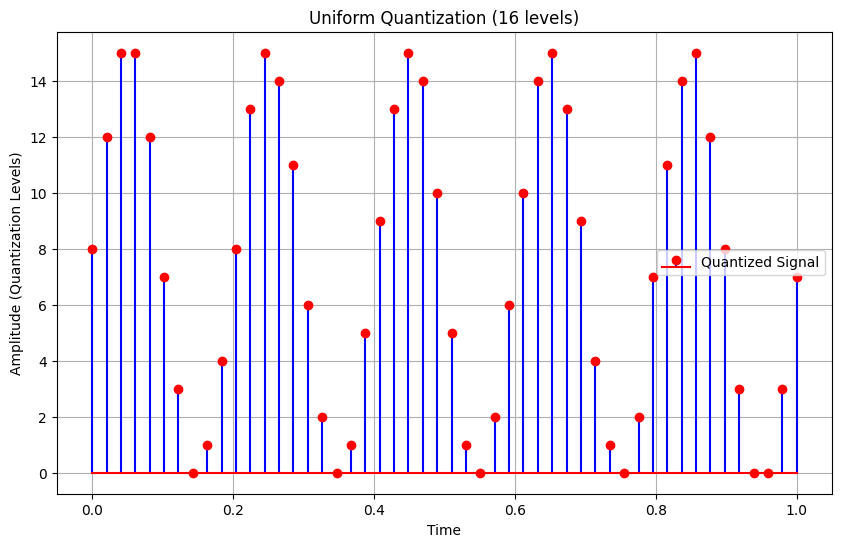

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sampled signal from Exercise 1
sampled_signal = np.sin(2 * np.pi * frequency * t_sampled)  # Replace with your sampled signal

# Define the number of quantization levels (bits)
num_levels = 16  # You can choose any number

# Perform uniform quantization
quantized_signal = np.round((num_levels - 1) * (sampled_signal - np.min(sampled_signal)) / (np.max(sampled_signal) - np.min(sampled_signal)))

# Visualize the quantized signal
plt.figure(figsize=(10, 6))
plt.stem(t_sampled, quantized_signal, markerfmt='ro', linefmt='b-', basefmt='r-', label='Quantized Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude (Quantization Levels)')
plt.title(f'Uniform Quantization ({num_levels} levels)')
plt.legend()
plt.grid(True)
plt.show()


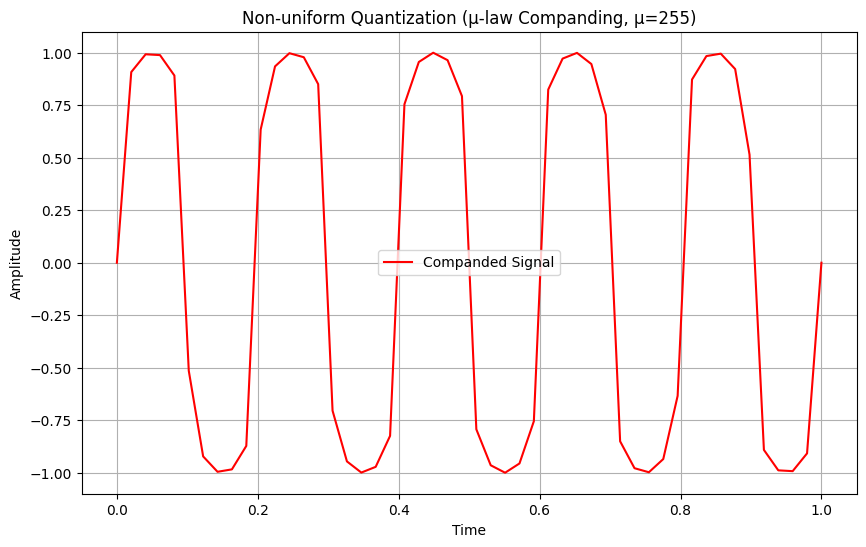

In [3]:
# Sampled signal from Exercise 1
sampled_signal = np.sin(2 * np.pi * frequency * t_sampled)  # Replace with your sampled signal.  # Replace with your sampled signal

# Define the companding parameter (μ)
mu = 255  # You can choose any value

# Apply µ-law companding
companded_signal = np.sign(sampled_signal) * (np.log(1 + mu * np.abs(sampled_signal)) / np.log(1 + mu))

# Visualize the companded signal
plt.figure(figsize=(10, 6))
plt.plot(t_sampled, companded_signal, 'r-', label='Companded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Non-uniform Quantization (µ-law Companding, μ={mu})')
plt.legend()
plt.grid(True)
plt.show()


SNR (dB): 49.59732169632395


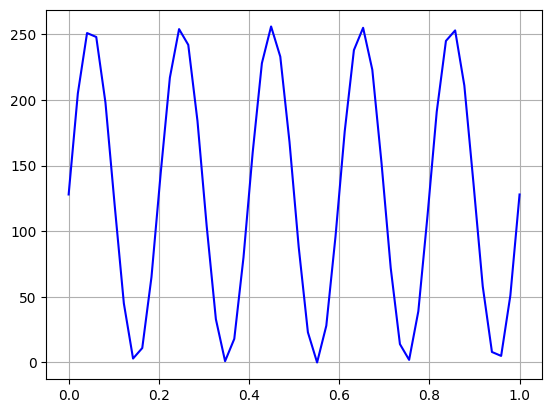

In [12]:
import numpy as np

# Sampled signal from Exercise 1
sampled_signal = np.sin(2 * np.pi * frequency * t_sampled)  # Replace with your sampled signal

# Define the number of quantization levels (bits)
num_bits = 8  # You can choose any number

# Compute the quantization step size
quantization_step = (np.max(sampled_signal) - np.min(sampled_signal)) / (2 ** num_bits)

# Perform PCM encoding
quantized_values = np.round((sampled_signal - np.min(sampled_signal)) / quantization_step).astype(int)

# Decode the PCM values
decoded_signal = quantized_values * quantization_step + np.min(sampled_signal)

# Calculate Signal-to-Noise Ratio (SNR)
original_signal_power = np.mean(sampled_signal ** 2)
quantization_error = sampled_signal - decoded_signal
quantization_error_power = np.mean(quantization_error ** 2)
snr_db = 10 * np.log10(original_signal_power / quantization_error_power)

print(f'SNR (dB): {snr_db}')
plt.plot(t_sampled,quantized_values, 'b-')
plt.grid(1)
